In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
from chebGreen.backend import plt
from chebGreen.utils import runCustomScript

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
example = 'fractional'
script = 'generate_fractional'

In [3]:
%%time
theta = 0.9
Nsample = 250
lmbda = 0.01
Nf = 1000
Nu = 1000
noise_level = 0
runCustomScript(script, example, theta, Nsample, lmbda, Nf, Nu, noise_level)

Number of samples: 250
Length scale: 0.01
Nf: 1000
Nu: 1000
Noise: 0%
---------------------------------------
> In chebfun2/constructor (line 121)
In chebfun2 (line 82)
In generate_fractional (line 31) 
Step = 1/250
Step = 2/250
Step = 3/250
Step = 4/250
Step = 5/250
Step = 6/250
Step = 7/250
Step = 8/250
Step = 9/250
Step = 10/250
Step = 11/250
Step = 12/250
Step = 13/250
Step = 14/250
Step = 15/250
Step = 16/250
Step = 17/250
Step = 18/250
Step = 19/250
Step = 20/250
Step = 21/250
Step = 22/250
Step = 23/250
Step = 24/250
Step = 25/250
Step = 26/250
Step = 27/250
Step = 28/250
Step = 29/250
Step = 30/250
Step = 31/250
Step = 32/250
Step = 33/250
Step = 34/250
Step = 35/250
Step = 36/250
Step = 37/250
Step = 38/250
Step = 39/250
Step = 40/250
Step = 41/250
Step = 42/250
Step = 43/250
Step = 44/250
Step = 45/250
Step = 46/250
Step = 47/250
Step = 48/250
Step = 49/250
Step = 50/250
Step = 51/250
Step = 52/250
Step = 53/250
Step = 54/250
Step = 55/250
Step = 56/250
Step = 57/250
Step = 5

In [5]:
data = DataProcessor("datasets/fractional/0.90.mat")
data.generateDataset(trainRatio = 0.95)

In [6]:
model = GreenNN()
dimension = 1
domain = [-1,1,-1,1]
layerConfig = [50,50,50,50]
activation = 'rational'
homogeneousBC = False
model.build(dimension = dimension, domain = domain, layerConfig = layerConfig, activation = activation, homogeneousBC = homogeneousBC)

In [7]:
%%time
lossHistory = model.train(data, epochs = {'adam':int(1000), 'lbfgs':int(0)})

Training with Adam:
Loss at epoch 100: Training = 3.797E-03, Validation = 5.407E-03
Loss at epoch 200: Training = 1.809E-03, Validation = 3.451E-03
Loss at epoch 300: Training = 1.071E-03, Validation = 2.691E-03
Loss at epoch 400: Training = 1.579E-03, Validation = 2.631E-03
Loss at epoch 500: Training = 8.198E-04, Validation = 2.380E-03
Loss at epoch 600: Training = 7.248E-04, Validation = 2.268E-03
Loss at epoch 700: Training = 6.702E-04, Validation = 2.207E-03
Loss at epoch 800: Training = 6.333E-04, Validation = 2.170E-03
Loss at epoch 900: Training = 6.060E-04, Validation = 2.146E-03
Loss at epoch 1000: Training = 5.847E-04, Validation = 2.128E-03
Training with LBFGS:
CPU times: user 2min 51s, sys: 27.4 s, total: 3min 18s
Wall time: 13min 52s


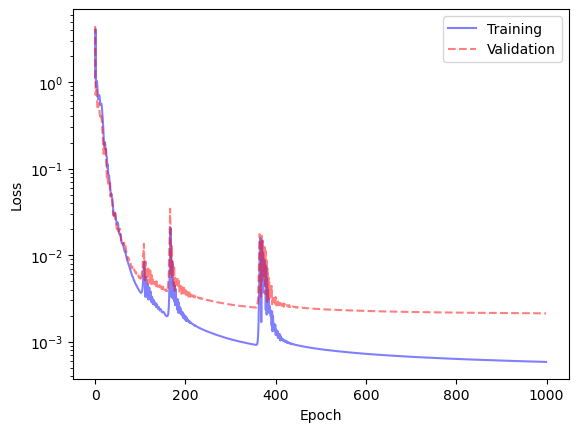

In [8]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [9]:
# model = GreenNN()
# model.build(dimension = 1, domain = [-1,1,-1,1], layerConfig = [50,50,50,50], activation = 'rational', homogeneousBC = False, loadPath = 'savedModels/frac9')

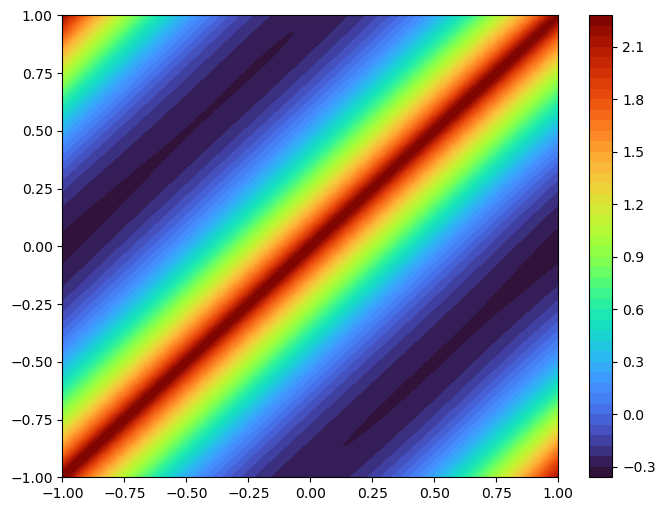

In [10]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

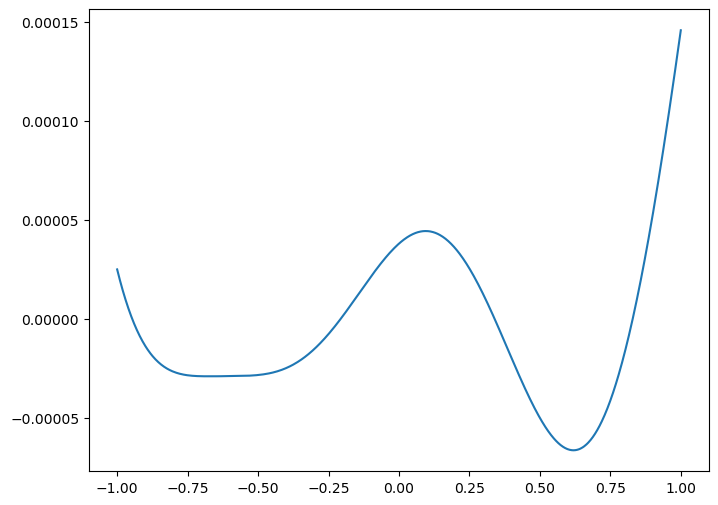

In [11]:
u_hom = model.evaluateN(xU)

fig = plt.figure(figsize = (8,6))
plt.plot(xU, u_hom)

In [10]:
model.saveModels('savedModels/frac')